In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import pandas as pd

<ipython-input-44-34cd28e20ad0>:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(lam),score)


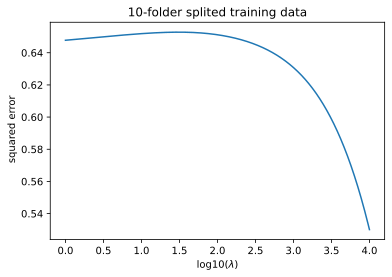

In [44]:
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")

train_label = df_train.values[:,0:1]
train_X = df_train.drop('ViolentCrimesPerPop', axis=1).values

test_label = df_test.values[:,0:1]
test_X = df_test.drop('ViolentCrimesPerPop', axis=1).values

X = train_X
y = train_label
X_test = test_X
y_test = test_label

lam = range(10000)
score = np.zeros((10000))

for i in lam:
    clf = linear_model.Ridge(alpha=i)
    scores = cross_val_score(clf, X, y, cv=10)
    score[i] = sum(scores)/10

name = '10-folder splited training data'
plt.title(name)
plt.xlabel('log10($\lambda$)')
plt.ylabel(' squared error')
fig1c = plt.gcf()
plt.plot(np.log10(lam),score)
fig1c.savefig('./fig1.jpg' , format="jpg")

<ipython-input-46-7ed63a07f09d>:11: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(lam),score)


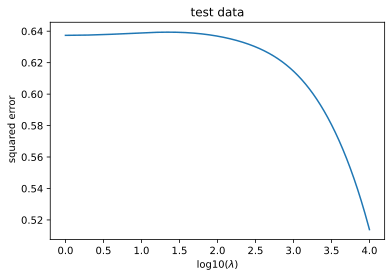

In [46]:
for i in lam:
    clf = linear_model.Ridge(alpha=i)
    clf.fit(X, y)
    score[i] = clf.score(X_test, y_test)

name = 'test data'
plt.title(name)
plt.xlabel('log10($\lambda$)')
plt.ylabel(' squared error')
fig2 = plt.gcf()
plt.plot(np.log10(lam),score)
fig2.savefig('./fig2.jpg' , format="jpg")